### Importing Libraries

In [11]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
import seaborn as sns
%matplotlib inline

### Loading Data

In [2]:
df = pd.read_csv("resampled_dataset.csv")

### Dataset Splitting

In [3]:
# Replace 'target_column' with the name of your target column
X = df.drop(columns=['Churn']).values
y = df['Churn'].values

In [4]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Training, Testing
#### All features 

In [55]:
# Train Decision Tree Classifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)


DecisionTreeClassifier()

In [56]:
# Predict on the test set
y_test_pred = model.predict(X_test)

In [57]:
cm = confusion_matrix(y_test, y_test_pred)

# Extract confusion matrix values
a11 = cm[0, 0]  # True Negatives
a12 = cm[0, 1]  # False Positives
a21 = cm[1, 0]  # False Negatives
a22 = cm[1, 1]  # True Positives

# Calculate fitness values
OA = (a11 + a22) / cm.sum() if cm.sum() != 0 else 0
TC = a22 / (a21 + a22) if (a21 + a22) != 0 else 0
TN = a11 / (a11 + a12) if (a11 + a12) != 0 else 0

# Print the results
print("Confusion Matrix:")
print(cm)
print("\nMetrics:")
print(f"True Positives (a22): {a22}")
print(f"True Negatives (a11): {a11}")
print(f"False Positives (a12): {a12}")
print(f"False Negatives (a21): {a21}")
print(f"Overall Accuracy (OA): {OA}")
print(f"True Positive Rate (TC): {TC}")
print(f"True Negative Rate (TN): {TN}")

Confusion Matrix:
[[809 228]
 [215 814]]

Metrics:
True Positives (a22): 814
True Negatives (a11): 809
False Positives (a12): 228
False Negatives (a21): 215
Overall Accuracy (OA): 0.7855759922555663
True Positive Rate (TC): 0.7910592808551993
True Negative Rate (TN): 0.7801350048216008


In [59]:
feature_names = df.drop(columns=['Churn']).columns
# Feature Importance
feature_importance = model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)


Feature Importances:
                                    Feature  Importance
19                  Contract_Month-to-month    0.191471
14                           MonthlyCharges    0.138092
15                             TotalCharges    0.128051
20                        Contract_One year    0.105583
4                                    tenure    0.088071
17              InternetService_Fiber optic    0.037112
21                        Contract_Two year    0.037046
24           PaymentMethod_Electronic check    0.027361
23    PaymentMethod_Credit card (automatic)    0.021315
22  PaymentMethod_Bank transfer (automatic)    0.020611
25               PaymentMethod_Mailed check    0.020449
13                         PaperlessBilling    0.019858
10                              TechSupport    0.017048
7                            OnlineSecurity    0.016717
0                                    gender    0.016577
8                              OnlineBackup    0.016146
2                         

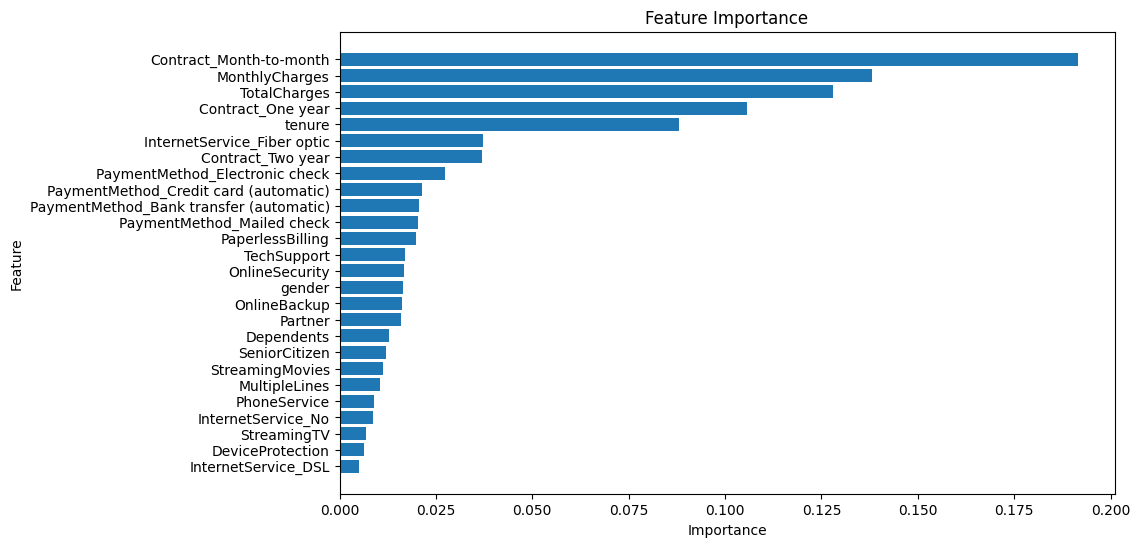

In [62]:
print("\nFeature Importances:")
print(importance_df)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], align='center')
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

### PCA

In [6]:
pca = PCA(n_components=15)
X_pca = pca.fit_transform(X)
print("Reduced feature shape after PCA:", X_pca.shape)

Reduced feature shape after PCA: (10326, 15)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y,
    test_size=0.2,
    random_state=42
)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

# Train the Decision Tree Classifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

y_train_pred = model.predict(X_train)
cm_train = confusion_matrix(y_train, y_train_pred)
print("Training Confusion Matrix:")
print(cm_train)

Training set shape: (8260, 15) (8260,)
Testing set shape: (2066, 15) (2066,)
Training Accuracy: 0.9991525423728813
Testing Accuracy: 0.7778315585672798
Training Confusion Matrix:
[[4124    2]
 [   5 4129]]


In [9]:
# Evaluate on Testing Set
y_test_pred = model.predict(X_test)
cm_test = confusion_matrix(y_test, y_test_pred)
print("Testing Confusion Matrix:")
print(cm_test)

# Extract confusion matrix values for testing
a11_test = cm_test[0, 0]  # True Negatives
a12_test = cm_test[0, 1]  # False Positives
a21_test = cm_test[1, 0]  # False Negatives
a22_test = cm_test[1, 1]  # True Positives

# Calculate metrics for testing
OA_test = (a11_test + a22_test) / cm_test.sum() if cm_test.sum() != 0 else 0
TC_test = a22_test / (a21_test + a22_test) if (a21_test + a22_test) != 0 else 0
TN_test = a11_test / (a11_test + a12_test) if (a11_test + a12_test) != 0 else 0

print("Testing Metrics:")
print(f"True Positives (a22_test): {a22_test}")
print(f"True Negatives (a11_test): {a11_test}")
print(f"False Positives (a12_test): {a12_test}")
print(f"False Negatives (a21_test): {a21_test}")
print(f"Overall Accuracy (OA_test): {OA_test}")
print(f"True Positive Rate (TC_test): {TC_test}")
print(f"True Negative Rate (TN_test): {TN_test}")


Testing Confusion Matrix:
[[796 241]
 [219 810]]
Testing Metrics:
True Positives (a22_test): 810
True Negatives (a11_test): 796
False Positives (a12_test): 241
False Negatives (a21_test): 219
Overall Accuracy (OA_test): 0.7773475314617618
True Positive Rate (TC_test): 0.7871720116618076
True Negative Rate (TN_test): 0.7675988428158148


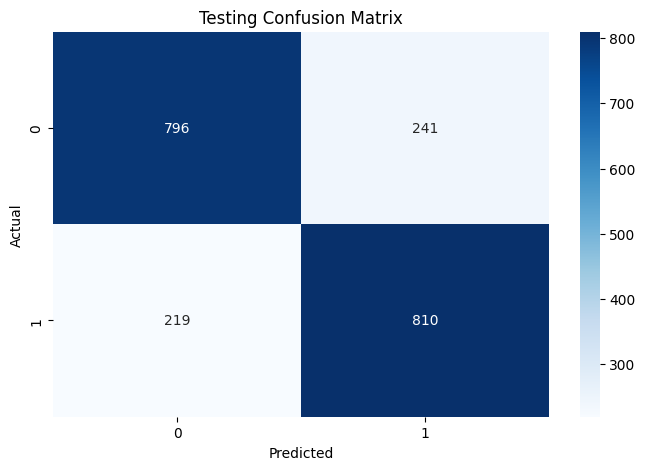

In [14]:
# Plot testing confusion matrix
plt.figure(figsize=(8, 5))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.title('Testing Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
